In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from mlscorecheck.auc import exponential_fitting, exponential_fitting2

In [32]:
input_label = 'single'

input_file = f'raw-{input_label}-20k.csv'
output_file = f'fit-{input_label}-20k.csv'

In [33]:
x = np.linspace(0, 1, 1000)
p = 0.5
y = (1 - (1 - x)**p)**(1/p)

In [34]:
def fit_curve(row, values, fracs):
    if values == 'fprs':
        values = row[values]
        fracs = row[fracs]
    else:
        values = row[values]
        fracs = 1 - row[fracs]
    p = np.logspace(-3, 2, 1000)
    err = np.abs(values[:, None]**p - 1 + (1 - fracs)[:, None]**p)
    err = np.mean(err, axis=0)
    exp = p[np.argmin(err)]

    pred = (1 - (1 - fracs)**exp)/(1/exp)

    r2 = r2_score(values, pred)

    return (r2, exp, 0)

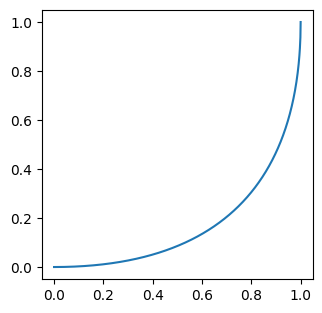

In [35]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(x, y)

In [36]:
data = pd.read_csv(input_file)

In [37]:
data['fprs'] = data['fprs'].apply(lambda x: np.array(eval(x)))
data['tprs'] = data['tprs'].apply(lambda x: np.array(eval(x)))

data['fracs'] = (data['fprs'] * data['n'] + data['tprs'] * data['p']) / (data['n'] + data['p'])

In [38]:


"""idx = -5

row = data.iloc[idx]

p_fprs = fit_curve(row['fprs'], row['fracs'])
p_tprs = fit_curve(row['tprs'], row['fracs'])
p_fprs, p_tprs

(r2_score((1 - (1 - row['fracs'])**p_fprs)**(1/p_fprs), row['fprs']),
 r2_score((1 - (1 - row['fracs'])**p_tprs)**(1/p_tprs), row['tprs']))"""

"idx = -5\n\nrow = data.iloc[idx]\n\np_fprs = fit_curve(row['fprs'], row['fracs'])\np_tprs = fit_curve(row['tprs'], row['fracs'])\np_fprs, p_tprs\n\n(r2_score((1 - (1 - row['fracs'])**p_fprs)**(1/p_fprs), row['fprs']),\n r2_score((1 - (1 - row['fracs'])**p_tprs)**(1/p_tprs), row['tprs']))"

In [39]:
data['r2_fpr'] = data.apply(lambda row: fit_curve(row, 'fprs', 'fracs'), axis=1)
data['exp_fpr'] = data['r2_fpr'].apply(lambda x: x[1])
data['fit_mode_fpr'] = data['r2_fpr'].apply(lambda x: x[2])
data['r2_fpr'] = data['r2_fpr'].apply(lambda x: x[0])

data['r2_tpr'] = data.apply(lambda row: fit_curve(row, 'tprs', 'fracs'), axis=1)
data['exp_tpr'] = data['r2_tpr'].apply(lambda x: x[1])
data['fit_mode_tpr'] = data['r2_tpr'].apply(lambda x: x[2])
data['r2_tpr'] = data['r2_tpr'].apply(lambda x: x[0])

In [40]:
data.columns

Index(['dataset', 'classifier', 'classifier_params', 'p', 'n', 'p_train',
       'n_train', 'auc', 'auc_train', 'fprs', 'tprs', 'thresholds', 'n_nodes',
       'fprs_train', 'tprs_train', 'thresholds_train', 'n_nodes_train', 'acc',
       'sens', 'spec', 'best_acc', 'best_sens', 'best_spec', 'acc_train',
       'sens_train', 'spec_train', 'best_acc_train', 'best_sens_train',
       'best_spec_train', 'fracs', 'r2_fpr', 'exp_fpr', 'fit_mode_fpr',
       'r2_tpr', 'exp_tpr', 'fit_mode_tpr'],
      dtype='object')

In [41]:
data['fprs'] = data['fprs'].apply(lambda x: str(x.tolist()))
data['tprs'] = data['tprs'].apply(lambda x: str(x.tolist()))
data['fracs'] = data['fracs'].apply(lambda x: str(x.tolist()))

In [42]:
data.to_csv(output_file, index=False)